Programming without internet is no fun... But now I'm back and things are better.

It is time to program in `R` once more, after two `Python` posts! There is a change in layout, though: I installed an `R` kernel to `jupyter`, so now I can create my `R` posts exactly like I create my `Python` posts. Exciting!

As always [mentioned before](http://lilithelina.tumblr.com/post/128638794919/choice-of-language), I want to compare `Python` and `R` analysis steps in the [DataManViz](http://lilithelina.tumblr.com/tagged/DataManViz), [DataAnaT](http://lilithelina.tumblr.com/tagged/DataAnaT), and [RegModPrac](http://lilithelina.tumblr.com/RegModPrac) projects.
Therefore, this is the `R` version of the [Multiple Linear Regression](http://lilithelina.tumblr.com/post/147984528439/multiple-linear-regression-python) `Python` script I posted before. Here, I'll use multiple linear regression to test the association between internet use rate (my response variable) and multiple explanatory variables - but first and foremost new breast cancer cases.

Again, the whole thing will look better over [here](http://htmlpreview.github.io/?https://github.com/LilithElina/Data-Analysis-and-Interpretation/blob/master/RegModPrac/Week_Three_MultipleRegression.html).

I will first run some of my previous code to prepare R, and remove variables I don't need and observations for which important data is missing.

In [1]:
#setwd("C:/Users/nolah_000/Dropbox/coursera/Data Analysis and Interpretation/RegModPrac")
setwd("C:/Users/Sarah/Dropbox/coursera/Data Analysis and Interpretation/RegModPrac")
#setwd("C:/Users/spo12/Dropbox/coursera/Data Analysis and Interpretation/RegModPrac")
options(stringsAsFactors=FALSE)

# load libraries
library(car) # for diagnostics
library(repr) # for smaller plots

# load data
gapminder <- read.table("../gapminder.csv", sep=",", header=TRUE, quote="\"")
# set row names
rownames(gapminder) <- gapminder$country

# subset data
sub_data <- subset(gapminder, select=c("breastcancerper100th", "urbanrate", "internetuserate", "incomeperperson"))

# remove rows with NAs
sub_data2 <- na.omit(sub_data)

The explanatory variables (all variables but internet usage) should be mean centred for easier interpretation. `R`'s `scale()` function is here a bit more comfortable than the manual process we used in `Python`.

In [2]:
# centre breast cancer data
sub_data2$breastCentre <- scale(sub_data2$breastcancerper100th, scale=FALSE)
sub_data2$incomeCentre <- scale(sub_data2$incomeperperson, scale=FALSE)
sub_data2$urbanCentre <- scale(sub_data2$urbanrate, scale=FALSE)
summary(sub_data2)

 breastcancerper100th   urbanrate      internetuserate  incomeperperson  
 Min.   :  3.90       Min.   : 10.40   Min.   : 0.720   Min.   :  103.8  
 1st Qu.: 20.60       1st Qu.: 36.84   1st Qu.: 9.102   1st Qu.:  691.1  
 Median : 30.30       Median : 59.46   Median :28.732   Median : 2425.5  
 Mean   : 37.78       Mean   : 56.25   Mean   :33.747   Mean   : 7312.4  
 3rd Qu.: 50.35       3rd Qu.: 73.49   3rd Qu.:52.513   3rd Qu.: 8880.4  
 Max.   :101.10       Max.   :100.00   Max.   :95.638   Max.   :52301.6  
  breastCentre.V1    incomeCentre.V1     urbanCentre.V1   
 Min.   :-33.8816   Min.   :-7208.60   Min.   :-45.84577  
 1st Qu.:-17.1816   1st Qu.:-6621.28   1st Qu.:-19.40577  
 Median : -7.4816   Median :-4886.91   Median :  3.21423  
 Mean   :  0.0000   Mean   :    0.00   Mean   :  0.00000  
 3rd Qu.: 12.5684   3rd Qu.: 1568.06   3rd Qu.: 17.24423  
 Max.   : 63.3184   Max.   :44989.21   Max.   : 43.75423  

`R`'s `summary()` function has less problems with floats than `Python`'s `describe()`, and the means of the centred variables are displayed as zeroes here. A bit annoying, though, are the ".V1" notations behind the column names I chose (I wonder why I didn't notice that last time). They are relics from the `scale()` function and I don't know how to avoid their creation. Interestingly, these additions are not shown when I simply print the column names of my data. If someone can explain that, please enlighten me.

In [3]:
print("column names of the data.frame:")
colnames(sub_data2)

[1] "column names of the data.frame:"


[1] "breastcancerper100th" "urbanrate"            "internetuserate"     
[4] "incomeperperson"      "breastCentre"         "incomeCentre"        
[7] "urbanCentre"

Be that as it may, the topic here is multiple linear regression, so let's get started on that. Or, well, on linear regression, as I'd like to once more repeat the basic analysis before moving on to using multiple explanatory variables.

In [4]:
fit1 <- lm(internetuserate ~ breastCentre, data=sub_data2)
summary(fit1)


Call:
lm(formula = internetuserate ~ breastCentre, data = sub_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.155 -11.719  -1.139   7.980  65.327 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  33.74736    1.34124   25.16   <2e-16 ***
breastCentre  0.95265    0.05819   16.37   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.12 on 161 degrees of freedom
Multiple R-squared:  0.6248,	Adjusted R-squared:  0.6224 
F-statistic: 268.1 on 1 and 161 DF,  p-value: < 2.2e-16


While the layout is not as nice as that of the `Python` output, I still enjoy the simplicity of the output from `lm()`. The most important information is all there, with almost no other clutter: the coefficients show the significant positive correlation of my centred breast cancer variable with internet usage, and the $r²$ value shows that around 62% of the variability in internet usage can be explained by the variability in breast cancer cases. Additionally, the high F-statistic shows that the variance between the variables is a lot higher than the variance within the variables (meaning the result is reliable).

Nevertheless, it would be interesting to see if the income of people, for example, can confound this association. Maybe people in higher income countries have more access to the internet, and to healthcare?

In [5]:
fit2 <- lm(internetuserate ~ breastCentre + incomeCentre, data=sub_data2)
summary(fit2)


Call:
lm(formula = internetuserate ~ breastCentre + incomeCentre, data = sub_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.987 -10.710  -2.616   8.759  45.835 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.375e+01  1.122e+00  30.066  < 2e-16 ***
breastCentre 5.174e-01  7.129e-02   7.258 1.61e-11 ***
incomeCentre 1.316e-03  1.575e-04   8.359 2.89e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.33 on 160 degrees of freedom
Multiple R-squared:  0.7388,	Adjusted R-squared:  0.7356 
F-statistic: 226.3 on 2 and 160 DF,  p-value: < 2.2e-16


Similar to `Python`, adding another explanatory variable to `lm()` is a simple addition of "+ variable" to the formula.  
The results are also similar to what I observed [before](http://lilithelina.tumblr.com/post/147984528439/multiple-linear-regression-python): both centred variables are significantly and positively associated with internet usage, and the $r^2$ value of the model increased a bit. The F-statistic, on the other hand, is slightly decreased, but still high.

Essentially, this indicates that both breast cancer prevalence and income are associated with internet usage, but do not confound each other (otherwise, one of the associations shouldn't be significant).

How about adding the urbanisation rates of the countries as well?

In [6]:
fit3 <- lm(internetuserate ~ breastCentre + incomeCentre + urbanCentre, data=sub_data2)
summary(fit3)


Call:
lm(formula = internetuserate ~ breastCentre + incomeCentre + 
    urbanCentre, data = sub_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.339  -9.309  -1.400   7.757  40.351 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.375e+01  1.064e+00  31.727  < 2e-16 ***
breastCentre 4.350e-01  7.013e-02   6.203 4.60e-09 ***
incomeCentre 1.115e-03  1.561e-04   7.145 3.07e-11 ***
urbanCentre  2.605e-01  5.950e-02   4.378 2.16e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.58 on 159 degrees of freedom
Multiple R-squared:  0.7669,	Adjusted R-squared:  0.7625 
F-statistic: 174.4 on 3 and 159 DF,  p-value: < 2.2e-16


Again, not much of a hint of confounding. All three variables are positively associated with internet usage, without really diminishing the associations of the others. The $r^2$ also increased a bit more, while the F-statistic further decreased. I assume that the variability between the variables decreases a bit, causing this.

The other part of this week's assignment on [coursera](https://www.coursera.org/learn/regression-modeling-practice/home/welcome) was creating some diagnostic plots for the multiple regression model. We started out with a quantile-quantile plot (also called qq plot), which - in `Python` - plots the quantiles of a model's residuals against theoretical quantiles. The `qqplot()` function from `R`'s `car` package, on the other hand, uses studetised residuals (meaning the residuals were divided by the standard deviation) to plot against the theoretical quantiles. The message stays the same, though.

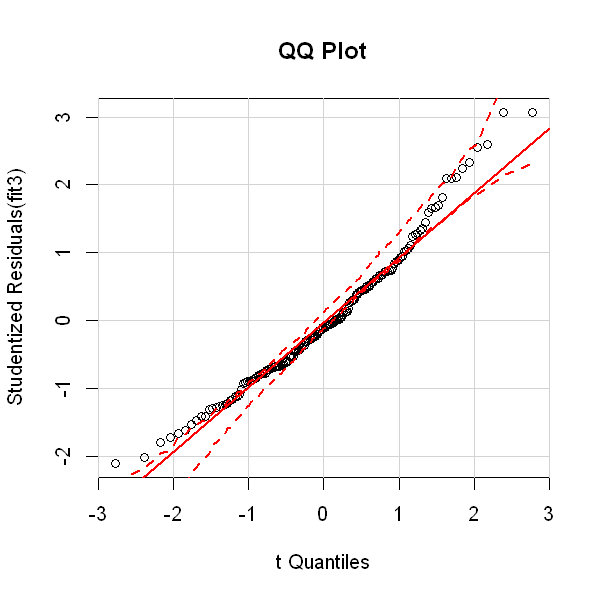

In [7]:
options(repr.plot.width=5, repr.plot.height=5)
qqPlot(fit3, main="QQ Plot")

The plot only looks different to the `Python` version due to the different representation (especially the added confidence envelope in form of the dashed lines), but we can still see the line marking the perfect normal distribution and that the data points move away from that line at both ends. This indicates that the model I created doesn't fully capture the real relationship of internet usage and the explanatory variables I used and whatever I might have missed. I still think it's not too bad, though, and I never expected anything to be perfect.

Next, we plotted the standardised (value minus mean divided by standard deviation) residuals over their observation number. This will yield data with a mean of zero, where each +/- 1 out is one additional standard deviation from the mean. I'll improvise the observation number with a simple range from one to the number of rows in my data here, so that I can use the standard plotting function.

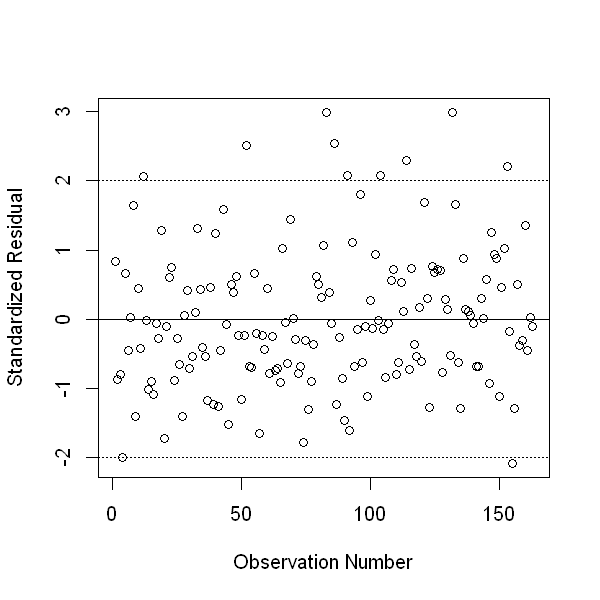

In [8]:
stdres <- rstandard(fit3)

options(repr.plot.width=5, repr.plot.height=5)
plot(1:nrow(sub_data2), stdres, ylab="Standardized Residual", xlab="Observation Number") 
abline(0, 0)
abline(2, 0, lty=3)
abline(-2, 0, lty=3)

As before in `Python`, we can see that, while many standardised residuals stay within one standard deviation of the mean, some are between two and three. The number of observations with such values is high enough to suggest a poor model fit, or that an additional explanatory variable is still missing.

A third plot we generated to assess the quality of our multiple regression model was a leverage plot. This can show if outliers have an undue influence on the whole model.

,StudRes,Hat,CookD
"Korea, Rep.",3.069187,0.04690272,0.1100620
Luxembourg,-1.615045,0.14922257,0.1132288


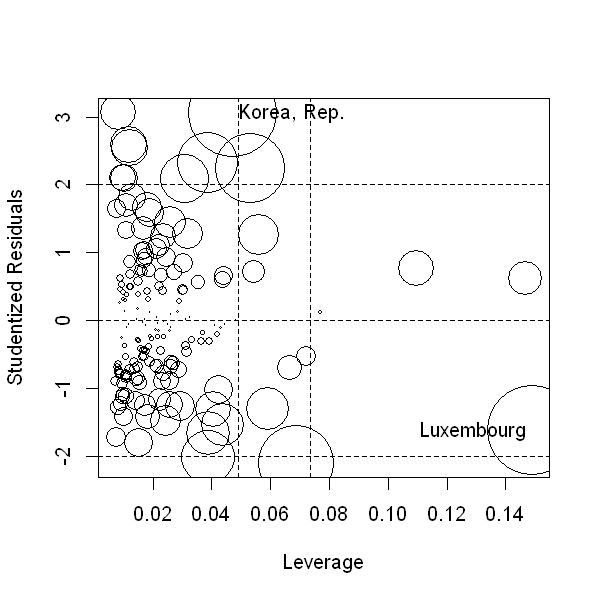

In [9]:
influencePlot(fit3, xlab="Leverage")

The `influencePlot()` function from the `car` package not only produces such a plot, but also returns more data on the most influential observations. In this case, these are the data from the Republic of Korea and from Luxembourg. While South Korea is clearly an outlier (studentised residual bigger than two), it doesn't have much leverage. Luxembourg, on the other hand, has one of the highest leverages (or hat values), but is not an outlier.  
By the way, Cook's distance is the measure of leverage, and indicates the effect of deleting a single observation from the data. I assume that the countries marked in the plot are those with the highest Cook's distances, since they also have the largest circle areas, which represent this.

Similar plots can also be directly created by using `plot.lm()` - or simply `plot()` on the model:

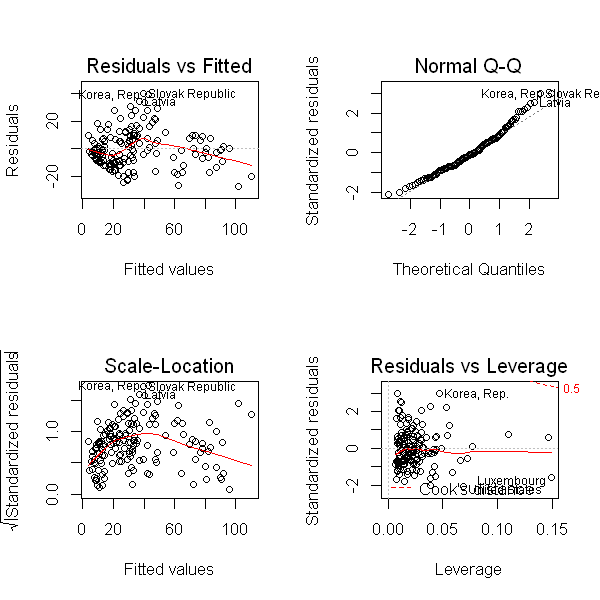

In [10]:
par(mfrow=c(2,2))
plot(fit3)

The first figure plots the residuals versus fitted values and can be used to detect non-linear patterns in the residuals. In this case, the fitted line is not exactly linear, but it is difficult to assign it any other pattern instead.

The Q-Q plot is the same as I've shown before, suggesting a not-exactly normal distribution. Nevertheless, the 
deviation from the dashed line is not enough to worry me.

Plotting the scale-, or spread-, location is a good way to visualise the variance in the residuals. The residuals should be spread out equally along the predictors, i.e. randomly spread points along a horizontal line would be nice. Obviously, I'm having a problem with [homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity) (or lack thereof) here. Maybe my model is really not as reliable as I'd hoped.

The fourth plot is again a leverage plot, showing essentially the same as before. Only the addition of the plotted Cook's distance is different, though we can't see much of these dashed red lines (except for in the upper right corner). Real cause for worry would be observations outside of these dashed lines, which we don't have here.

In general, I'm not sure how much I should worry about these diagnostics. Apparently I'm still not covering all information from the data in my model, but it seems to work all right.  
Interesting is that in the first three plots, the same three countries are always highlighted as possibly problematic, and South Korea even appears in all four. What's the matter with these countries?

In [11]:
countries <- c("Korea, Rep.", "Slovak Republic", "Latvia", "United States", "Luxembourg")
sub_data2[countries, ]

,breastcancerper100th,urbanrate,internetuserate,incomeperperson,breastCentre,incomeCentre,urbanCentre
"Korea, Rep.",20.4,81.46,82.51593,16372.500,-17.381595,9060.123,25.2142331
Slovak Republic,48.0,56.56,79.88978,8445.527,10.218405,1133.150,0.3142331
Latvia,44.3,68.12,71.51472,5011.219,6.518405,-2301.157,11.8742331
United States,101.1,81.70,74.24757,37491.180,63.318405,30178.803,25.4542331
Luxembourg,82.5,82.44,90.07953,52301.587,44.718405,44989.210,26.1942331


In all countries that were mentioned in the diagnostics plots above, the internet use rate is high (it could also have values below one). The centred explanatory variables, on the other hand, differ greatly: South Korea sports negative centred breast cancer cases, while Latvia shows negative centred income and the centred urbanisation rate is lowest in the Slovak Republic. Luxembourg sticks out for having high values throughout.

What does that mean? Well, I don't know. Since, based on the linear model, we assume linear, positive relationships between internet usage and all explanatory variables, these five countries with high internet usage and very different explanatory variable values surely stick out. That is probably why they showed up on the plots. Are these big problems? I don't know, but since it's mostly one explanatory variable that breaks away from the expected pattern, it is probably not too bad.